# The iris dataset

In [1]:
import seaborn as sns    #a plotting library
sns.set()

iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Seaborn employs **Pandas**, which is a python library for managing tables.  
For example, we can parse arrays with column names instead of indices.

Columns that take numerical values are called features.  
In this case, the last column is a **class**.  
  
Pairplot allows to create graphs based on multiple features.

/home/pachy/.cache/pypoetry/virtualenvs/ai_lab-aGYZY7pK-py3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


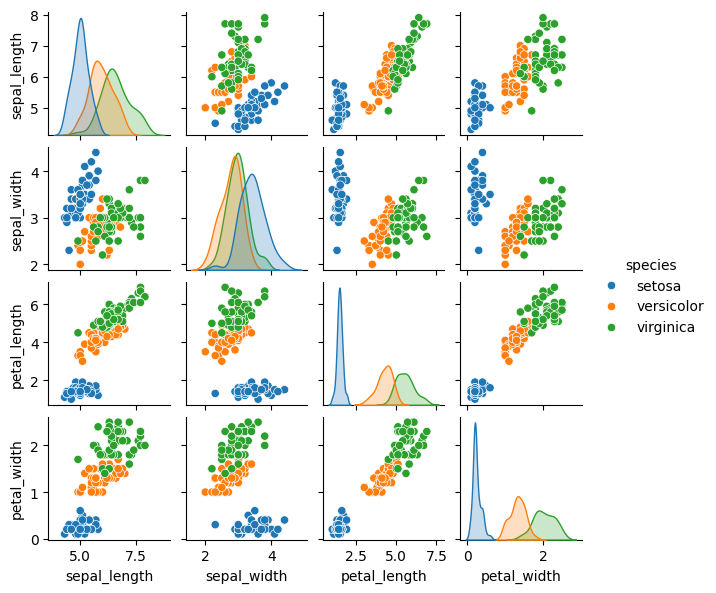

In [2]:
sns.pairplot(iris, hue='species', size = 1.5)

Let's split features from classes, or *labels*:

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

# Classification

In [8]:
from sklearn.naive_bayes import GaussianNB          #this uses Bayes theorem
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_iris, y_iris)


GaussianNB()

In [10]:
y_pred = model.predict(X_iris)
accuracy = accuracy_score(y_pred, y_iris)
accuracy

0.96

This value is not as high as it seems since we are evaluating the accuracy score on the training set.  
We can use scikitlearn pre-built function to split between training and testing.

In [16]:
from sklearn.model_selection import train_test_split

#random_state is the seed generator

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=0, train_size=0.5)

model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred)
accuracy

0.9466666666666667

# Linear regression

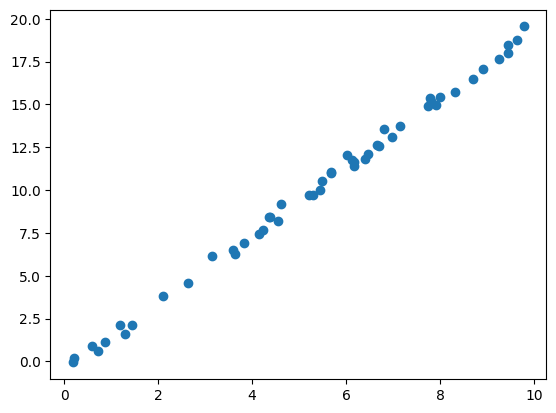

In [17]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(0)

x = 10 * rng.rand(50)
y = 2 * x- 1 + rng.rand(50)

plt.scatter(x, y)
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
#Let's add another dimension (since ScikitLearn requires it)
X = x[:, np.newaxis]

model.fit(X, y)

LinearRegression()

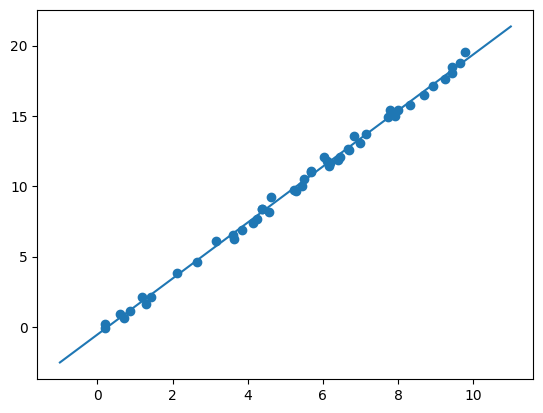

In [19]:
xfit = np.linspace(-1, 11, 50)

Xfit = xfit [:, np.newaxis]
y_pred = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(Xfit, y_pred)
plt.show()
